# Section 5: Computations and Applications / Final Project

Coming to the end of the term we are going to combine and review topics from the last sections to answer computational questions involving matrices.

## Homework 5: Stationary methods for solving positive definite systems

In class you have discussed iterative methods for solving linear systems. In the following exercise we will implement a stationary method based on a few smoothers (L1 and variations of Gauss-Seidel).

In the code below I have implemented the algorithm for a smoother based stationary method. Stationary solvers are only garaunteed to converge for SPD systems, you might have justified this during lecture.

Your task in this exercise is to create the smoothers and evaluate the convergence rate for each. The smoothers to be implemented are:
*   L1
*   Forward Gauss-Seidel
*   Symmetric Gauss-Seidel

The `stationary` function I have implemented takes `smoother` as an argument. A cool feature of python is syntactically simple first class functions. All that means is functions can be treated just like any other variable. In this case, the `smoother` argument below is a function that takes some `residual` vector and returns the inverse action of the smoother on that vector. As an example, I have implemented Backward Gauss-Seidel.

In [13]:
import scipy.sparse
from numpy.linalg import norm
from scipy.io import mmread
from scipy.sparse import csr_matrix, tril, triu, diags
from scipy.sparse.linalg import spsolve_triangular
from scipy.linalg import qr
import numpy as np
#from google.colab import drive
import matplotlib.pyplot as plt
#drive.mount('/content/drive')

In [14]:
def stationary(A, rhs, guess, max_iter, epsilon, smoother):
  x = guess.copy()
  residual = rhs - A @ x #this is the error vector b-Ax
  r0_norm = norm(residual) #size of the error vector
  norm_history = []

  for iter in range(max_iter):
    r_norm = norm(residual)
    norm_history.append(r_norm)

    if r_norm < epsilon * r0_norm: #if this is true, the error is sufficiently small, so we stop.
      return (True, x, norm_history)

    # if the error is not small enough, we continue through the process and send the current error vector
    # to the smoother function. this solves Ax' = residual for x' and adds that x' to our x here
    x += smoother(residual)
    residual = rhs - A @ x
  
  return (False, x, norm_history)

### Backward Gauss Seidel Solution

In [15]:
def bgs(): #Backward Gauss-Seidel
  #folder = 'drive/MyDrive/mth343/matrices'
  folder = 'mth343/matrices'
  name = 'bcsstk05'
  mat = mmread(f'{folder}/{name}.mtx').tocsr()
  upper = triu(mat, format='csr')

  def bgs_smoother(residual):
    return spsolve_triangular(upper, residual, lower=False)

  dim = mat.shape[0]
  return stationary(mat, np.ones(dim), np.zeros(dim), 2000, 1e-5, bgs_smoother)

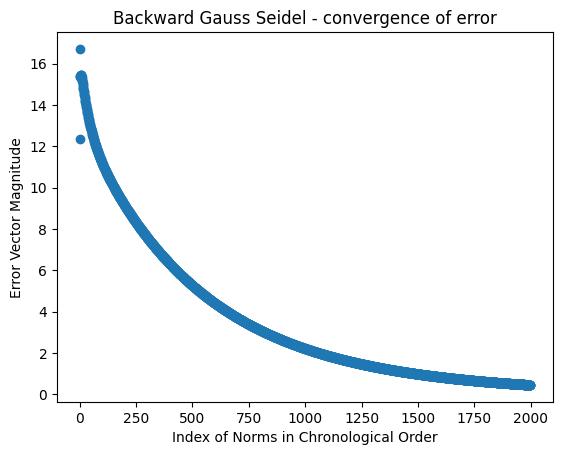

In [16]:
converged, x, history = bgs()
index_of_norms_in_history = np.arange(len(history))

plt.title('Backward Gauss Seidel - convergence of error')
plt.xlabel('Index of Norms in Chronological Order')
plt.ylabel('Error Vector Magnitude')
plt.scatter(index_of_norms_in_history, history)
plt.show()




Forward Gauss Seidel Solution - Micron

In [17]:
def fgs(): #Forward Gauss-Seidel
  #folder = 'drive/MyDrive/mth343/matrices'
  folder = 'mth343/matrices'
  name = 'bcsstk05'
  mat = mmread(f'{folder}/{name}.mtx').tocsr()
  lower = tril(mat, format='csr')

  def fgs_smoother(residual):
    return spsolve_triangular(lower, residual, lower=True)

  dim = mat.shape[0]
  return stationary(mat, np.ones(dim), np.zeros(dim), 2000, 1e-5, fgs_smoother)

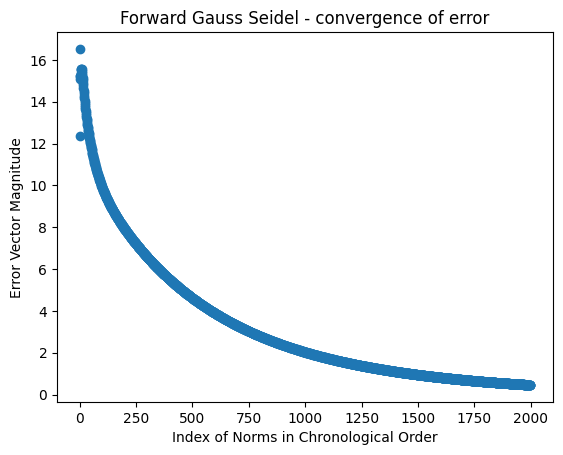

In [18]:
converged, x, history = fgs()
index_of_norms_in_history = np.arange(len(history))

plt.title('Forward Gauss Seidel - convergence of error')
plt.xlabel('Index of Norms in Chronological Order')
plt.ylabel('Error Vector Magnitude')
plt.scatter(index_of_norms_in_history, history)
plt.show()



Symmetric Gauss Seidel Solution - Micron

In [19]:
def sgs(): #Symmetric Gauss-Seidel
  #folder = 'drive/MyDrive/mth343/matrices'
  folder = 'mth343/matrices'
  name = 'bcsstk05'
  mat = mmread(f'{folder}/{name}.mtx').tocsr()
  lower = tril(mat, format='csr')
  diag = csr_matrix.diagonal(mat)
  upper = triu(mat, format='csr')

  def sgs_smoother(residual):
    L_inv_r = spsolve_triangular(lower, residual, lower=True)
    d_inv_L = diag * L_inv_r
    return spsolve_triangular(upper, d_inv_L, lower=False)

  dim = mat.shape[0]
  return stationary(mat, np.ones(dim), np.zeros(dim), 2000, 1e-5, sgs_smoother)

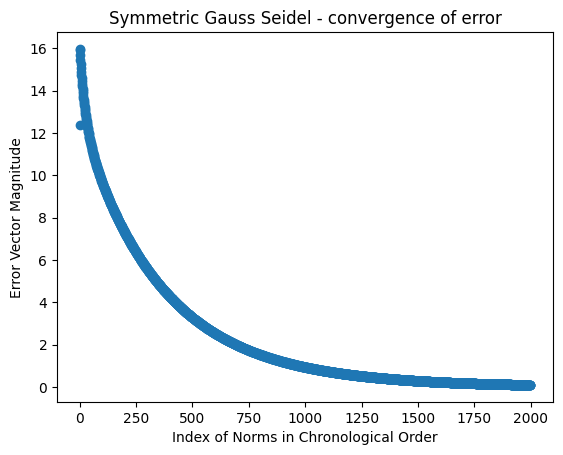

In [20]:
converged, x, history = sgs()
index_of_norms_in_history = np.arange(len(history))

plt.title('Symmetric Gauss Seidel - convergence of error')
plt.xlabel('Index of Norms in Chronological Order')
plt.ylabel('Error Vector Magnitude')
plt.scatter(index_of_norms_in_history, history)
plt.show()

In [ ]:
def l1(): # L1 Smoother
  #folder = 'drive/MyDrive/mth343/matrices'
  folder = 'mth343/matrices'
  name = 'bcsstk05'
  mat = mmread(f'{folder}/{name}.mtx').tocsr()
  upper = triu(mat, format='csr')

  def bgs_smoother(residual):
    return spsolve_triangular(upper, residual, lower=False)

  dim = mat.shape[0]
  return stationary(mat, np.ones(dim), np.zeros(dim), 2000, 1e-5, bgs_smoother)

In [ ]:
converged, x, history = l1()
index_of_norms_in_history = np.arange(len(history))

plt.title('Backward Gauss Seidel - convergence of error')
plt.xlabel('Index of Norms in Chronological Order')
plt.ylabel('Error Vector Magnitude')
plt.scatter(index_of_norms_in_history, history)
plt.show()

## Final Project

There are two algorithms for the final project. You will:
*   implement
*   test with various matrices
*   describe the results by plotting the convergence of the algorithm with respect to the iterations (may provide multiple plots for different sets of parameters)

The basic option is Arnoldi. A bonus part is implementing the Generalized Minimal Residual (GMRES) algorithm on top of it.

### Arnoldi Algorithm

Let $A$ be a given $n \times n$ matrix. We will use it only via its actions on any given vector $\mathbf p$, i.e., it may be given as a function with input $A$ and vector $\mathbf v$ which returns a vector $\mathbf w = A \mathbf v$.


The implementation requires computing inner products of vectors $\mathbf p$ and $\mathbf q$, and norm $\|.\|$ of vectors.
The output of the algorithm is a set of orthogonal vectors $\{\mathbf q_i\}$ and a $m \times m$ matrix $H = (h_{ij})$ where $h_{ij} = 0 $ for $i > j+1$.


- Input: matrix $A$, a vector $\mathbf r$, and an integer $m$. Typical values $m=5, 10, 50, ...$ (much smaller than the size $n$ of the matrix $A$).
- Output: matrix $Q=[\mathbf q_0,\mathbf q_1,\mathbf q_2, \cdots, \mathbf q_m]$ with orthonormal columns and an $m+1 \times m+1$ matrix $H = (h_{ij})$ with zeros below the 1st diagonal below  the main one.
If $A$ is symmetric, $H = (h_{ij})$ is also symmetric and hence becomes tridiagonal, that is, $h_{ij} = 0$ for $|i-j| > 1$ (all entries outside the band of the three main diagonals of the matrix are zero).

#### Algorithm

- Initialize $\mathbf q_0= \mathbf r/\|\mathbf r\|$.
-  Loop: For $j$ in range $(0,m)$:
  - $\mathbf v = A \mathbf q_j$.

  - Loop: For $i$ in range $(0,j+1)$:
    - $h_{ij} = \mathbf q^T_i \mathbf v$
    - $\mathbf v= \mathbf v-h_{ij}\mathbf q_i$
  - $h_{j+1,j} = \|\mathbf v\|$
  - $\mathbf q_{j+1} = \mathbf v/h_{j+1,j}$

#### Analysis
Use `scipy.linalg.eigh_tridiagonal` to get the eigenvalues of the resulting $H$ and plot the maximum and minimum eigenvalues as $H$ grows in size. Calculate the maximum and minimum eigenvalues of the matrix and plot these as horizonal lines on this results.

In [31]:
# Arnoldi Algorithm
def Arnoldi(A, m, r):
  """
  :param A: n*n matrix in numpy style format
  :param m: integer such that m < n  (much smaller) (typically 5, 10, 50, etc)
  :param r: n-vector in numpy style format
  :return: n*(m+1) matrix Q with orthonormal columns and (m+1)*(m+1) matrix H (upper triangular
   above -1st diagonal)
  """

  #initialize Q, H
  Q = np.zeros((A.shape[0], m+1))
  H = np.zeros((m+1, m+1)) #is this even efficient given we are going to be doing a lot of inserts?

  #normalize r for first column of Q
  Q[:,0] = r / np.linalg.norm(r)

  for j in range(m):
    v = A@Q[:,j]
    for i in range(j + 1):
      H[i,j] = Q[:,i] @ v
      v = v - H[i,j] * Q[:,i]
    H[j+1,j] = np.linalg.norm(v)
    Q[:,j+1] = v/H[j+1,j]

  return Q, H[:m,:m]


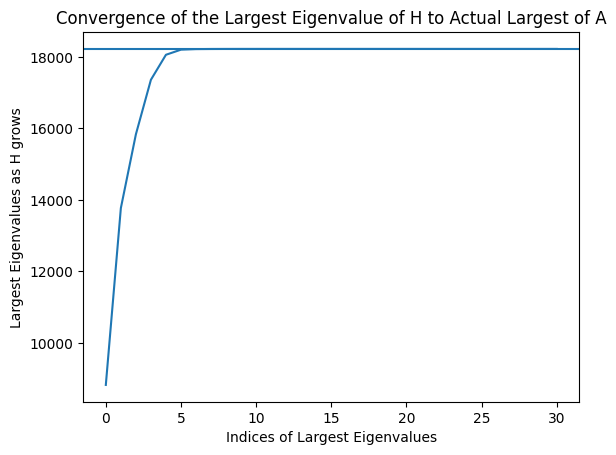

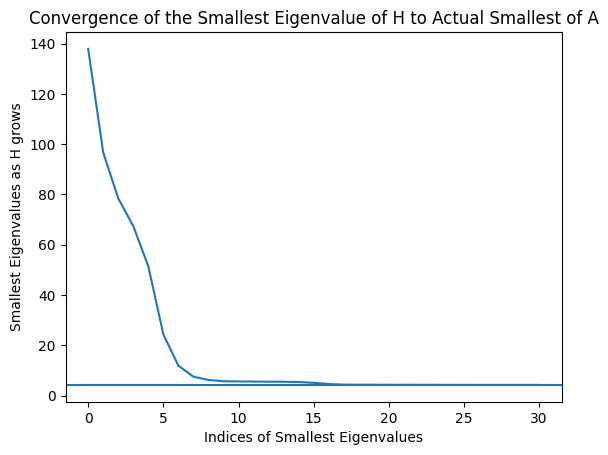

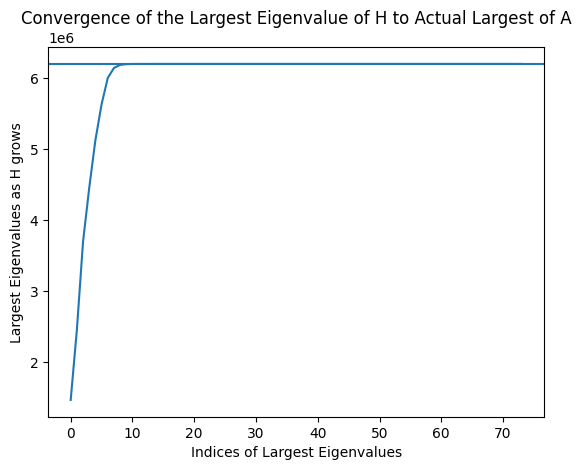

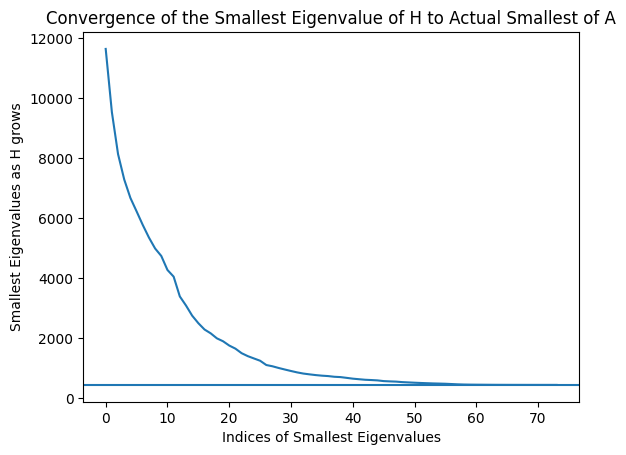

In [40]:
# Analysis
# Use `scipy.linalg.eigh_tridiagonal` to get the eigenvalues of the resulting H and plot the maximum and minimum eigenvalues as H grows in size. Calculate the maximum and minimum eigenvalues of the matrix and plot these as horizonal lines on this results.
from scipy.linalg import eigh_tridiagonal as eigs
from scipy.sparse.linalg import eigsh as eig

folder = 'mth343/matrices'
names = ['bcsstk02', 'bcsstk05']
mats = [mmread(f'{folder}/{name}.mtx').tocsr() for name in names]


results = [Arnoldi(mat, mat.shape[0]//2, np.ones(mat.shape[0])) for mat in mats]

for A,result in zip(mats, results):
  H = result[1]
  large_eigs = []
  small_eigs = []

  largeA = eig(A, k=1, which='LM')
  smallA = eig(A, k=1, which='SM')
  for i in range(2, H.shape[0]):
    partial = H[:i,:i]
    w, _ = eigs(np.diag(partial), np.diag(partial, k=1))
    large_eigs.append(w[-1])
    small_eigs.append(w[0])
  #make two plots
  x_s = np.arange(len(large_eigs))
  plt.title('Convergence of the Largest Eigenvalue of H to Actual Largest of A')
  plt.xlabel('Indices of Largest Eigenvalues')
  plt.ylabel('Largest Eigenvalues as H grows')
  plt.plot(x_s, large_eigs)
  plt.axhline(y=largeA[0])
  plt.show()
  plt.title('Convergence of the Smallest Eigenvalue of H to Actual Smallest of A')
  plt.xlabel('Indices of Smallest Eigenvalues')
  plt.ylabel('Smallest Eigenvalues as H grows')
  plt.plot(x_s, small_eigs)
  plt.axhline(y=smallA[0])
  plt.show()

### Bonus: GMRES

Let $A$ be a given $n \times n$ matrix. 
The input for GMRES:

- matrix $A$
- r.h.s. $\mathbf b$
- initial iterate $\mathbf x_0$ (typical values: either zero, or random)
- *max_iter*, the maximal number of iterations allowed (typical values are 100, 1000)
- tolerance $\epsilon$ (typical; values are $10^{-6}$, $10^{-9}$)

The output of the algorithm is $\mathbf x$ the approximate solution, $iter$ - number of iterations used, $\|\mathbf r_0\|, \|\mathbf r\|$ - norm of the initial and  final residuals, and perhaps CPU time.



- Input: GMRES$(A, \mathbf b, \mathbf x_0, m, \mathbf x_0, \epsilon, \text{max_iter})$.

- Output $\mathbf x, \|\mathbf r\|, \|\mathbf r_0\|, \text{iter}, \text{time}$.

#### Algorithm

- Initiate:
  - $\mathbf r_0 = \mathbf b - A \mathbf x_0$, $\delta_0 = \|\mathbf r_0\|$.
  - $\mathbf r = \mathbf r_0$, $\mathbf x=\mathbf x_0$.

  - Loop: For $iter$ from $0$ to max_iter:
    - $P, H = \text{Arnoldi}(A, \mathbf r, m)$
    - $B = AP$.
    - $Q, R= \text{QR}(B)$.
    - $\mathbf z = Q^T\mathbf r$
    - $\mathbf \alpha = \text{upper\_triangual\_solve}(R, \mathbf z)$
    - $\mathbf x+=P\mathbf \alpha$
    - $\mathbf r -= B \mathbf \alpha$.
    - $\delta= \|\mathbf r\|$
    - If $\delta < \epsilon \delta_0$:
      - return $\mathbf x, \|\mathbf r\|, \|\mathbf r_0\|, \text{iter}$ (and CPU time).

#### Analysis
Run on all of the sparse matrices `*.mtx` from the data folder and plot iteration (or run-time) on x-axis and relative residual norm on y-axis.

In [ ]:
# Generalized Minimal Residual - GMRES
import time

def GMRES(A, b, x0, m, max_iter, epsilon):
  """
  :param A: n*n matrix in numpy style format
  :param b: rhs vector of Ax=b
  :param x0: initial guess for solution x
  :param m: integer much less than n to send into Arnoldi algorithm
  :param max_iter: max number of iterations to do (typically 100, 1000, etc)
  :param epsilon: tolerance level of how much error we allow (typically 10^(-6), 10^(-9))
  :return: approximate solution: x, norms of initial and final residuals r0 and r, number of iterations used: iter, runtime of the algorithm
  """

  #initialize r0, delta0, r, x
  r0 = b - A@x0
  delta0 = norm(r0)
  r = r0
  x = x0

  #starting a timer for returning runtime
  start = time.time()

  for iter in range(max_iter):
    P, H = Arnoldi(A, r, m)
    B = A@P
    Q, R = qr(B)
    z = Q.T @ r
    alpha = spsolve_triangular(R, z, lower=False)
    x += P@alpha
    r -= B@alpha
    delta = norm(r)
    if delta < epsilon*delta0:
      runtime = time.time() - start
      return x, delta, delta0, iter, runtime

#### Report

Make a few comments about each plot you generated. For Arnoldi, note which eigenvalues get better convergence and how well the algorithm works on different matrices (try with sparse/dense/large/small/etc).

Describe the algorithm and what each step is doing.